In [ ]:
!ls "../../../data/starting_data/not-filtered-data/"

In [ ]:
# %matplotlib ipympl
# import matplotlib.pyplot as plt
# plt.style.use(['dark_background'])

In [1]:
import numpy as np
import pandas as pd
import altair as alt
import matplotlib.pyplot as plt
from itertools import combinations 
import os 


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
import seaborn as sns; sns.set_style("whitegrid", {'axes.grid' : False})
import skbio
from scipy.spatial import distance

# Data Creation

## Reading The Data

In [10]:
os.listdir('../../../data/starting_data/not-filtered-data/')

['feature-table-l2.tsv',
 'feature-table-l3.tsv',
 'feature-table-l4.tsv',
 'feature-table-l5.csv',
 'feature-table-l6.csv',
 'feature-table-l7.csv',
 'feature-table-norm-l2.tsv',
 'feature-table-norm-l3.tsv',
 'feature-table-norm-l4.tsv',
 'feature-table-norm-l5.csv',
 'feature-table-norm-l6.csv',
 'feature-table-norm-l7.csv',
 'feature-table-original.tsv',
 'Iconï€\x8d',
 'OTU_FIX_feature-table-norm-l7.csv',
 'table.tsv']

In [3]:
# dvir_path = "/vol/sci/bio/data/moran.yassour/lab/Projects/Dvir"
# data_path = f"{dvir_path}/data/starting_data"
data_path = "../../../data/starting_data/"

norm_features_l6_path = f"{data_path}/not-filtered-data/feature-table-norm-l6.csv"
features_l6_path = f"{data_path}/not-filtered-data/feature-table-l6.csv"
features_l7_path = f"{data_path}/not-filtered-data/feature-table-l7.csv"
fixed_l7_path = f"{data_path}/not-filtered-data/OTU_FIX_feature-table-norm-l7.csv"
# features_l5_path = f"{data_path}/feature-table-norm-l5.tsv"
# FIX_features_l5_path = f"{data_path}/FIX_feature-table-norm-l5.tsv"
edited_metadta = f"{data_path}/edited_metadata.tsv"

feature_path = fixed_l7_path
data_df = pd.read_csv(feature_path,sep='\t')
data_df.head(10)

OTU ID  sub.110.0.initial  \
0              k__Unassigned;p__;c__;o__;f__;g__;s__           0.000059   
1                 k__Archaea;p__;c__;o__;f__;g__;s__           0.000000   
2    k__Archaea;p__Euryarchaeota;c__;o__;f__;g__;s__           0.000000   
3  k__Archaea;p__Euryarchaeota;c__Methanobacteria...           0.000000   
4                k__Bacteria;p__;c__;o__;f__;g__;s__           0.000158   
5                k__Bacteria;p__;c__;o__;f__;g__;s__           0.000000   
6             k__Bacteria;p__AD3;c__;o__;f__;g__;s__           0.000000   
7  k__Bacteria;p__Acidobacteria;c__Acidobacteriia...           0.000000   
8  k__Bacteria;p__Acidobacteria;c__Solibacteres;o...           0.000000   
9  k__Bacteria;p__Actinobacteria;c__Acidimicrobii...           0.000000   

   sub.110.1.two.week  sub.110.2.one.month  sub.110.3.twomonth  \
0            0.000031             0.000220            0.000061   
1            0.000000             0.000000            0.000000   
2            0.000000             0.000000            0.000000   
3            0.000000             0.000000            0.000000   
4            0.000817             0.001395            0.000648   
5            0.000000             0.000000            0.000000   
6            0.000000             0.000000            0.000000   
7            0.000000             0.000000            0.000000   
8            0.000000             0.000000            0.000000   
9            0.000000             0.000000            0.000000   

   sub.110.4.fourmonth  sub.110.5.sixmonth  sub.110.6.ninemonth  \
0             0.000067            0.000137             0.000018   
1             0.000000            0.000000             0.000000   
2             0.000000            0.000000             0.000000   
3             0.000000            0.000000             0.000000   
4             0.000174            0.000438             0.000018   
5             0.000000            0.000000             0.000000   
6             0.000000            0.000000             0.000000   
7             0.000000            0.000000             0.000000   
8             0.000000            0.000000             0.000000   
9             0.000000            0.000000             0.000000   

   sub.111.0.initial  sub.111.1.two.week  ...  sub.97.3.twomonth  \
0           0.000000             0.00000  ...           0.000071   
1           0.000000             0.00000  ...           0.000000   
2           0.000000             0.00000  ...           0.000000   
3           0.000000             0.00000  ...           0.000000   
4           0.000494             0.00013  ...           0.001857   
5           0.000000             0.00000  ...           0.000000   
6           0.000000             0.00000  ...           0.000000   
7           0.000000             0.00000  ...           0.000000   
8           0.000000             0.00000  ...           0.000000   
9           0.000000             0.00000  ...           0.000000   

   sub.97.4.fourmonth  sub.97.5.sixmonth  sub.97.7.one.year  sub.99.0.initial  \
0            0.000000           0.000101           0.000063          0.000000   
1            0.000000           0.000000           0.000000          0.000000   
2            0.000000           0.000000           0.000000          0.000000   
3            0.000000           0.000000           0.000000          0.000000   
4            0.000049           0.000740           0.000273          0.000314   
5            0.000000           0.000000           0.000000          0.000000   
6            0.000000           0.000000           0.000000          0.000000   
7            0.000000           0.000000           0.000000          0.000000   
8            0.000000           0.000000           0.000000          0.000000   
9            0.000000           0.000000           0.000000          0.000000   

   sub.99.1.two.week  sub.99.2.one.month  sub.99.3.twomonth  \
0           0.000037            0.000513           

In [30]:
data_df.loc[~data_df["OTU ID"].str.startswith("Unassigned")]

OTU ID  sub.110.0.initial  \
0                k__Unassigned;p__;c__;o__;f__;g__;s__           0.000059   
1                   k__Archaea;p__;c__;o__;f__;g__;s__           0.000000   
2      k__Archaea;p__Euryarchaeota;c__;o__;f__;g__;s__           0.000000   
3    k__Archaea;p__Euryarchaeota;c__Methanobacteria...           0.000000   
4                  k__Bacteria;p__;c__;o__;f__;g__;s__           0.000158   
..                                                 ...                ...   
487  k__Bacteria;p__Verrucomicrobia;c__Verrucomicro...           0.000000   
488  k__Bacteria;p__Verrucomicrobia;c__Verrucomicro...           0.000000   
489  k__Bacteria;p__Verrucomicrobia;c__[Methylacidi...           0.000000   
490  k__Bacteria;p__Verrucomicrobia;c__[Spartobacte...           0.000000   
491           k__Bacteria;p__WPS-2;c__;o__;f__;g__;s__           0.000000   

     sub.110.1.two.week  sub.110.2.one.month  sub.110.3.twomonth  \
0              0.000031             0.000220            0.000061   
1              0.000000             0.000000            0.000000   
2              0.000000             0.000000            0.000000   
3              0.000000             0.000000            0.000000   
4              0.000817             0.001395            0.000648   
..                  ...                  ...                 ...   
487            0.000000             0.000000            0.000000   
488            0.000000             0.000000            0.000000   
489            0.000000             0.000000            0.000000   
490            0.000000             0.000000            0.000000   
491            0.000000             0.000000            0.000000   

     sub.110.4.fourmonth  sub.110.5.sixmonth  sub.110.6.ninemonth  \
0               0.000067            0.000137             0.000018   
1               0.000000            0.000000             0.000000   
2               0.000000            0.000000             0.000000   
3               0.000000            0.000000             0.000000   
4               0.000174            0.000438             0.000018   
..                   ...                 ...                  ...   
487             0.000147            0.000178             0.000082   
488             0.000000            0.000000             0.000000   
489             0.000000            0.000000             0.000000   
490             0.000000            0.000000             0.000000   
491             0.000000            0.000000             0.000000   

     sub.111.0.initial  sub.111.1.two.week  ...  sub.97.3.twomonth  \
0             0.000000             0.00000  ...           0.000071   
1             0.000000             0.00000  ...           0.000000   
2             0.000000             0.00000  ...           0.000000   
3             0.000000             0.00000  ...           0.000000   
4             0.000494             0.00013  ...           0.001857   
..                 ...                 ...  ...                ...   
487           0.000000             0.00000  ...           0.000000   
488           0.000000             0.00000  ...           0.000000   
489           0.000000             0.00000  ...           0.000000   
490           0.000000             0.00000  ...           0.000000   
491           0.000000             0.00000  ...           0.000000   

     sub.97.4.fourmonth  sub.97.5.sixmonth  sub.97.7.one.year  \
0              0.000000           0.000101           0.000063   
1              0.000000           0.000000           0.000000   
2              0.000000           0.000000           0.000000   
3              0.000000           0.000000           0.000000   
4              0.000049           0.000740           0.000273   
..                  ...                ...                ...   
487            0.000000           0.000090           0.000000   
488            0.000000           0.000000           0.000000   
489            0.000000           0.000000         

In [4]:
def build_data_dfs(data_path,drop_unassigned=False):
    """
    drop_unassigned: If true will remove the row where all the unmatched bacteria goes to
    """
    data_df = pd.read_csv(data_path,sep='\t')
    
    if drop_unassigned:
        data_df = data_df.loc[~data_df["OTU ID"]
                              .str.contains("Unassigned")].reset_index(drop=True)
    # data_df

    # create a df where the index is sampleID and columns are bacterias id.
    #In order to get the bacteria name we could merge with original table
    t_df = data_df.T.drop("OTU ID")
    t_df.index.name = "index"
    t_df = t_df.reset_index().rename(columns={t_df.index.name:"sample_name"})
    t_df.sample_name = t_df.sample_name.astype(str)
    samples_df = t_df.copy()


    meta_df = pd.read_csv(edited_metadta,sep='\t').rename(columns={"sampleID":"sample_name"})
    data_col_pos = meta_df.shape[1]
    merged_df = meta_df.merge(samples_df,on=['sample_name'])

    return {"data_df":data_df,"samples_df":samples_df,"meta_df":meta_df,"merged_df":merged_df,"data_col_pos":data_col_pos}

In [31]:
data_df_indexed = data_df.set_index("OTU ID",drop=True)

In [32]:
data_df_indexed.head()

sub.110.0.initial  \
OTU ID                                                                  
k__Unassigned;p__;c__;o__;f__;g__;s__                        0.000059   
k__Archaea;p__;c__;o__;f__;g__;s__                           0.000000   
k__Archaea;p__Euryarchaeota;c__;o__;f__;g__;s__              0.000000   
k__Archaea;p__Euryarchaeota;c__Methanobacteria;...           0.000000   
k__Bacteria;p__;c__;o__;f__;g__;s__                          0.000158   

                                                    sub.110.1.two.week  \
OTU ID                                                                   
k__Unassigned;p__;c__;o__;f__;g__;s__                         0.000031   
k__Archaea;p__;c__;o__;f__;g__;s__                            0.000000   
k__Archaea;p__Euryarchaeota;c__;o__;f__;g__;s__               0.000000   
k__Archaea;p__Euryarchaeota;c__Methanobacteria;...            0.000000   
k__Bacteria;p__;c__;o__;f__;g__;s__                           0.000817   

                                                    sub.110.2.one.month  \
OTU ID                                                                    
k__Unassigned;p__;c__;o__;f__;g__;s__                          0.000220   
k__Archaea;p__;c__;o__;f__;g__;s__                             0.000000   
k__Archaea;p__Euryarchaeota;c__;o__;f__;g__;s__                0.000000   
k__Archaea;p__Euryarchaeota;c__Methanobacteria;...             0.000000   
k__Bacteria;p__;c__;o__;f__;g__;s__                            0.001395   

                                                    sub.110.3.twomonth  \
OTU ID                                                                   
k__Unassigned;p__;c__;o__;f__;g__;s__                         0.000061   
k__Archaea;p__;c__;o__;f__;g__;s__                            0.000000   
k__Archaea;p__Euryarchaeota;c__;o__;f__;g__;s__               0.000000   
k__Archaea;p__Euryarchaeota;c__Methanobacteria;...            0.000000   
k__Bacteria;p__;c__;o__;f__;g__;s__                           0.000648   

                                                    sub.110.4.fourmonth  \
OTU ID                                                                    
k__Unassigned;p__;c__;o__;f__;g__;s__                          0.000067   
k__Archaea;p__;c__;o__;f__;g__;s__                             0.000000   
k__Archaea;p__Euryarchaeota;c__;o__;f__;g__;s__                0.000000   
k__Archaea;p__Euryarchaeota;c__Methanobacteria;...             0.000000   
k__Bacteria;p__;c__;o__;f__;g__;s__                            0.000174   

                                                    sub.110.5.sixmonth  \
OTU ID                                                                   
k__Unassigned;p__;c__;o__;f__;g__;s__                         0.000137   
k__Archaea;p__;c__;o__;f__;g__;s__                            0.000000   
k__Archaea;p__Euryarchaeota;c__;o__;f__;g__;s__               0.000000   
k__Archaea;p__Euryarchaeota;c__Methanobacteria;...            0.000000   
k__Bacteria;p__;c__;o__;f__;g__;s__                           0.000438   

                                                    sub.110.6.ninemonth  \
OTU ID                                                                    
k__Unassigned;p__;c__;o__;f__;g__;s__                          0.000018   
k__Archaea;p__;c__;o__;f__;g__;s__                             0.000000   
k__Archaea;p__Euryarchaeota;c__;o__;f__;g__;s__                0.000000   
k__Archaea;p__Euryarchaeota;c__Methanobacteria;...             0.000000   
k__Bacteria;p__;c__;o__;f__;g__;s__                            0.000018   

                                                    sub.111.0.initial  \
OTU ID                                                                  
k__Unassigned;p__;c__;o__;f__;g__;s__                        0.000000   
k__Archaea;p__;c__;o__;f__;g__;s__                           0.000000   
k__Archaea;p__Euryarchaeota;c__;o__;f__;g__;s__              0.000000   
k__Archaea;p__Euryarchaeota;c__Methanoba

## Data Examples

In [9]:
# create a df where the index is sampleID and columns are bacterias id.
#In order to get the bacteria name we could merge with original table
data_df = pd.read_csv(data_path,sep='\t')
t_df = data_df.T.drop("OTU ID")
t_df.index.name = "index"
t_df = t_df.reset_index().rename(columns={t_df.index.name:"sample_name"})
t_df.sample_name = t_df.sample_name.astype(str)
samples_df = t_df.copy()


samples_df.head()

sample_name            0  1  2  3            4  5  6  7  8  ...  \
0    sub.110.0.initial  5.91938e-05  0  0  0   0.00015785  0  0  0  0  ...   
1   sub.110.1.two.week  3.14204e-05  0  0  0  0.000816929  0  0  0  0  ...   
2  sub.110.2.one.month  0.000220326  0  0  0    0.0013954  0  0  0  0  ...   
3   sub.110.3.twomonth  6.07165e-05  0  0  0  0.000647642  0  0  0  0  ...   
4  sub.110.4.fourmonth   6.6769e-05  0  0  0    0.0001736  0  0  0  0  ...   

  336 337 338 339 340          341 342 343 344 345  
0   0   0   0   0   0            0   0   0   0   0  
1   0   0   0   0   0            0   0   0   0   0  
2   0   0   0   0   0            0   0   0   0   0  
3   0   0   0   0   0            0   0   0   0   0  
4   0   0   0   0   0  0.000146892   0   0   0   0  

[5 rows x 347 columns]

In [10]:
meta_df = pd.read_csv(edited_metadta,sep='\t').rename(columns={"sampleID":"sample_name"})
data_col_pos = meta_df.shape[1]
merged_df = meta_df.merge(samples_df,on=['sample_name'])
merged_df.head()
# meta_df.merge(samples_df,)

sample_name sample_time  record_id  visit_age_mo            diet  \
0  sub.29.2.one.month    onemonth         29           0.9    Partially BF   
1    sub.31.0.initial     initial         31           0.1         Formula   
2    sub.20.0.initial     initial         20           0.2  Exclusively BF   
3   sub.20.1.two.week     twoweek         20           0.7  Exclusively BF   
4  sub.46.2.one.month    onemonth         46           1.1    Partially BF   

          diet0mo  symptoms mode_of_delivery gender race_final  ...  336  337  \
0    Partially BF  Resolved        C-section   Male      White  ...    0    0   
1         Formula   Control          Vaginal   Male      White  ...    0    0   
2  Exclusively BF   Control        C-section   Male      Asian  ...    0    0   
3  Exclusively BF   Control        C-section   Male      Asian  ...    0    0   
4    Partially BF   Control          Vaginal   Male      White  ...    0    0   

   338  339  340        341  342 343  344 345  
0    0    0    0          0    0   0    0   0  
1    0    0    0          0    0   0    0   0  
2    0    0    0          0    0   0    0   0  
3    0    0    0  0.0169775    0   0    0   0  
4    0    0    0          0    0   0    0   0  

[5 rows x 367 columns]

In [11]:
# Make sure `data_col_pos` is actually where the data starts
merged_df.iloc[:,data_col_pos:]

0   1   2   3            4   5   6   7   8   9    ... 336 337  \
0    0.000104362   0   0   0  0.000452237   0   0   0   0   0  ...   0   0   
1    8.94342e-05   0   0   0   0.00126997   0   0   0   0   0  ...   0   0   
2     0.00032498   0   0   0   0.00292482   0   0   0   0   0  ...   0   0   
3    0.000211425   0   0   0  0.000507421   0   0   0   0   0  ...   0   0   
4              0   0   0   0  0.000699344   0   0   0   0   0  ...   0   0   
..           ...  ..  ..  ..          ...  ..  ..  ..  ..  ..  ...  ..  ..   
983  7.51965e-05   0   0   0  0.000827161   0   0   0   0   0  ...   0   0   
984  9.76413e-05   0   0   0  0.000278975   0   0   0   0   0  ...   0   0   
985  1.84424e-05   0   0   0  0.000165981   0   0   0   0   0  ...   0   0   
986  6.46012e-05   0   0   0  0.000917336   0   0   0   0   0  ...   0   0   
987  4.87852e-05   0   0   0  0.000914723   0   0   0   0   0  ...   0   0   

    338 339 340          341 342 343 344 345  
0     0   0   0            0   0   0   0   0  
1     0   0   0            0   0   0   0   0  
2     0   0   0            0   0   0   0   0  
3     0   0   0    0.0169775   0   0   0   0  
4     0   0   0            0   0   0   0   0  
..   ..  ..  ..          ...  ..  ..  ..  ..  
983   0   0   0            0   0   0   0   0  
984   0   0   0            0   0   0   0   0  
985   0   0   0  6.45483e-05   0   0   0   0  
986   0   0   0            0   0   0   0   0  
987   0   0   0  6.09816e-05   0   0   0   0  

[988 rows x 346 columns]

## Building the Training 

In [5]:
def create_data(df,data_col_pos,elements_per_sample = 3):
    """
    elements_per_sample: how many examples will appear together for the training
    """


    train_data = list()
    is_sick_data = list()
    meta_data = list()
    records_ids = df.record_id.unique().tolist()

    #build the data for each record
    for rid in records_ids:
        subject_df = df[df.record_id == rid]

        # Transform the df to numpy and take only the columns for the data (and not the metadata)
        full_data_arr = subject_df.iloc[:,data_col_pos:].to_numpy()
        sample_meta_data = subject_df.iloc[:,data_col_pos:].to_numpy()
        n = subject_df.shape[0]

        # get the idxs ot the elements to take for each training sample
        sets_idxs = list(combinations(np.arange(0,n),elements_per_sample))

        subject_train_samples = np.take(full_data_arr,sets_idxs,axis=0)

        # decide if this each sample is sick or not if at least one of the samples is tagged as sick
        # TODO - using AP case is because the symptoms might have probmels -  sample 29 is assigned as "AP Case" but        doesn't have "Symptomatic" in the symptoms
        is_sick = np.array([any(subject_df.iloc[list(idx)].case_id == "AP Case") for idx in sets_idxs])

        train_data.append(subject_train_samples)
        is_sick_data.append(is_sick)
        
#         if (subject_df.case_id == 'AP Case').any():
#             symptoms = subject_df.symptoms.unique()
#             if len(symptoms) == 1:
#                 print("#################################")
#                 print(f"Printing symptoms for id {rid}")
#                 print(subject_df.symptoms.unique())
    return train_data, is_sick_data
    


In [6]:
data_dfs = build_data_dfs(features_l6_path)
merged_df = data_dfs['merged_df']
data_col_pos = data_dfs['data_col_pos']

In [7]:
train_data, is_sick_data = create_data(merged_df,data_col_pos,3)
full_data = np.concatenate(train_data)
full_is_sick = np.concatenate(is_sick_data)
assert (len(full_data) == len(full_is_sick)),"Must get same size of is_sick examples and train examples"

# full_is_sick is the label for each example if should predict sick or not.
#full_data is the data, divided to groups of elements_per_sample (3)
full_is_sick.shape,full_data.shape

((6621,), (6621, 3, 346))

## Data Visualization

In [14]:
meta_df.symptoms.head()

0    Resolved
1     Control
2     Control
3     Control
4     Control
Name: symptoms, dtype: object

In [15]:
alt.Chart(meta_df).mark_point().encode(
alt.X('sample_time',type='nominal'),
alt.Y('diet',type='nominal'),
alt.Size('count(symptoms)'),
color='symptoms')

alt.Chart(...)

In [16]:
source = meta_df
alt.Chart(source).mark_bar(
    cornerRadiusTopLeft=3,
    cornerRadiusTopRight=3
).encode(
    x='sample_time:N',
    y='count(record_id):Q',
    color='diet:N',
    tooltip=['diet','sample_time']
)

alt.Chart(...)

In [9]:
import altair as alt
from vega_datasets import data

source = data.cars()

alt.Chart(source).mark_circle(size=60).encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    color='Origin',
    tooltip=['Name', 'Origin', 'Horsepower', 'Miles_per_Gallon']
).interactive()

<VegaLite 3 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


In [22]:
small_df = meta_df.groupby(['sample_time','case_id']).agg({
    'record_id':'count',
    'diet':list,
    'visit_age_mo':min
}).sort_values('visit_age_mo')
small_df

record_id  \
sample_time case_id              
initial     AP Case         39   
            No AP           55   
sick        No AP           33   
            AP Case        182   
twoweek     No AP           44   
            AP Case         43   
onemonth    AP Case         63   
            No AP           61   
twomonth    No AP           69   
            AP Case         72   
fourmonth   No AP           61   
            AP Case         58   
sixmonth    AP Case         47   
            No AP           58   
ninemonth   No AP           47   
            AP Case         52   
oneyear     AP Case         39   
            No AP           34   

                                                                  diet  \
sample_time case_id                                                      
initial     AP Case  [Exclusively BF, Exclusively BF, Partially BF,...   
            No AP    [Formula, Exclusively BF, Exclusively BF, Excl...   
sick        No AP    [Partially BF, No information, No information,...   
            AP Case  [No information, No information, No informatio...   
twoweek     No AP    [Exclusively BF, Partially BF, Exclusively BF,...   
            AP Case  [Formula, Exclusively BF, Exclusively BF, Excl...   
onemonth    AP Case  [Partially BF, Formula, Exclusively BF, Exclus...   
            No AP    [Partially BF, Exclusively BF, Exclusively BF,...   
twomonth    No AP    [Exclusively BF, Exclusively BF, Partially BF,...   
            AP Case  [Formula, Exclusively BF, Exclusively BF, Excl...   
fourmonth   No AP    [Formula, Partially BF, Formula, Formula, Excl...   
            AP Case  [Partially BF, Formula, Exclusively BF, Formul...   
sixmonth    AP Case  [Formula, nan, Exclusively BF, nan, Exclusivel...   
            No AP    [Formula, Partially BF, nan, Formula, Exclusiv...   
ninemonth   No AP    [No information, No information, No informatio...   
            AP Case  [No information, No information, No informatio...   
oneyear     AP Case  [No information, No information, No informatio...   
            No AP    [No information, No information, No informatio...   

                     visit_age_mo  
sample_time case_id                
initial     AP Case           0.1  
            No AP             0.1  
sick        No AP             0.2  
            AP Case           0.2  
twoweek     No AP             0.3  
            AP Case           0.3  
onemonth    AP Case           0.8  
            No AP             0.8  
twomonth    No AP             1.6  
            AP Case           1.6  
fourmonth   No AP             3.7  
            AP Case           3.9  
sixmonth    AP Case           5.9  
            No AP             6.0  
ninemonth   No AP             8.4  
            AP Case           8.5  
oneyear     AP Case          11.5  
            No AP            12.0

&lt;matplotlib.axes._subplots.AxesSubplot at 0x281da73cc08&gt;

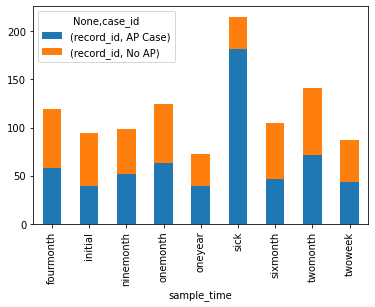

In [23]:

small_df.drop(inplace=True,columns='visit_age_mo')
small_df.unstack(level=1).plot(kind='bar',stacked=True)

In [20]:
import altair as alt

# load a simple dataset as a pandas DataFrame
from vega_datasets import data
cars = data.cars()

alt.Chart(cars).mark_point().encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    color='Origin',
).interactive()

<VegaLite 3 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


In [25]:
import pandas as pd
import altair as altair
data = pd.DataFrame({'a': list('CCCDDDEEE'),
                     'b': [2, 7, 4, 1, 2, 6, 8, 4, 7]})
chart = alt.Chart(data)


In [28]:
alt.Chart(data).mark_bar().encode(
    alt.X('a',type='nominal'),
    alt.Y('b',type='quantitative',aggregate='average')
)

alt.Chart(...)

In [29]:
import altair as alt
from vega_datasets import data

source = data.seattle_weather()

alt.Chart(source).mark_bar(
    cornerRadiusTopLeft=3,
    cornerRadiusTopRight=3
).encode(
    x='month(date):O',
    y='count():Q',
    color='weather:N'
)

alt.Chart(...)

In [38]:
!conda install seaborn

^C


# Dim Reduction tests

## Preprocessing & imports

In [8]:
from __future__ import print_function
import time
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import plotly.express as px

In [9]:
def plot_3d_for_col(df:pd.DataFrame,col:str,x='x',y='y',z='z',show=True):
    clean_df = df[~df[col].isna()].copy()

    fig = px.scatter_3d(clean_df, x=x, y=y, z=z,color=col)
    if show:
        fig.show()
    return fig
    
def plot_2d_for_col(df:pd.DataFrame,col:str,x='x',y='y',z='z'):
    clean_df = df[~df[col].isna()].copy()

    fig = px.scatter(clean_df, x=x, y=y,color=col)
    fig.show()
    
    return fig

def iter_plot_df(df,cols):
    for col in cols:
        if len(df[col].unique()) > 20:
            continue
        print(f"Plotting for {col}")
        plot_3d_for_col(df,col)
        yield

In [53]:
data_path = '../../../data/starting_data/not-filtered-data/'
os.listdir(data_path)

['feature-table-l2.tsv',
 'feature-table-l3.tsv',
 'feature-table-l4.tsv',
 'feature-table-l5.csv',
 'feature-table-l6.csv',
 'feature-table-l7.csv',
 'feature-table-norm-l2.tsv',
 'feature-table-norm-l3.tsv',
 'feature-table-norm-l4.tsv',
 'feature-table-norm-l5.csv',
 'feature-table-norm-l6.csv',
 'feature-table-norm-l7.csv',
 'feature-table-original.tsv',
 'Iconï€\x8d',
 'OTU_FIX_feature-table-norm-l7.csv',
 'table.tsv']

## MNIST EXAMPLE

In [53]:
mnist = fetch_openml("mnist_784")
X = mnist.data / 255.0
y = mnist.target
print(X.shape, y.shape)

(70000, 784) (70000,)


In [54]:
feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]
df = pd.DataFrame(X,columns=feat_cols)
df['y'] = y
df['label'] = df['y'].apply(lambda i: str(i))
X, y = None, None
print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (70000, 786)


In [55]:
# For reproducability of the results
np.random.seed(42)
rndperm = np.random.permutation(df.shape[0])

<Figure size 432x288 with 0 Axes>

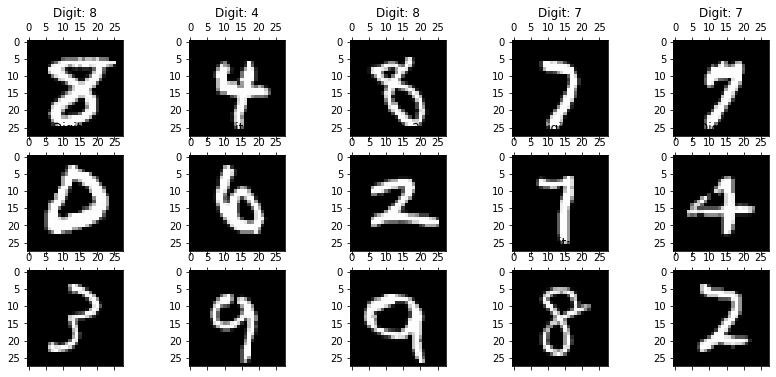

In [56]:
plt.gray()
fig = plt.figure( figsize=(14,6) )
for i in range(0,15):
    ax = fig.add_subplot(3,5,i+1, title="Digit: {}".format(str(df.loc[rndperm[i],'label'])) )
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((28,28)).astype(float))
plt.show()

In [57]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df[feat_cols].values)
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.09746116 0.07155445 0.06149531]


<AxesSubplot:xlabel='pca-one', ylabel='pca-two'>

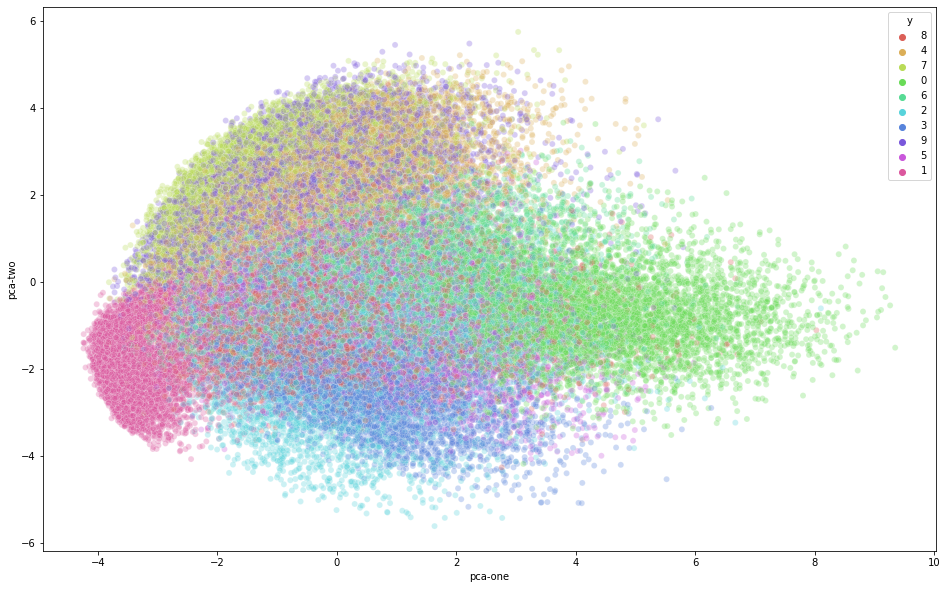

In [58]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df.loc[rndperm,:],
    legend="full",
    alpha=0.3
)

## GMAT PCA

In [51]:
# def plot_3d_for_col(df:pd.DataFrame, col:str, replace_dict,cmap='Set1',
#                            figsize=(16,10),alpha=0.3):

#     df['c'] = df[col].dropna().replace(replace_dict)
#     ax = plt.figure(figsize=figsize).gca(projection='3d')
#     ax.scatter(
#         xs=df['x'], ys=df['y'],zs=df['z'],
#         c=df['c'],
#         cmap=cmap,
#         alpha=alpha
#     )
    
# def plot_2d_for_col(df,col,cmap='Set1',figsize=(16,10),alpha=0.3):
# #     replace_d = {"Resolved":0, "Control":1,"Pre-symptoms":2,"Symptomatic":3}
# #     merge_df['c'] = merge_df.symptoms.replace(replace_d)
#     n_colors = df[col].dropna().unique().shape[0]
#     sns.scatterplot(
#         x="x", y="y",
#         hue=col,
#         palette=sns.color_palette("hls", n_colors),
#         data=df,
#         legend="full",
#         alpha=0.3
#     )
    

In [61]:
os.path.exists(f"{data_path}/")

True

In [62]:
# Get the raw data df. The data is transposed so each sample is a row and each feature is a column
"""merge the transposed dataframe (index is the sampleID and columns are the bacteria sampling)
and the metadata df using the sampleID column. This should give us the metadta on the 
bacteria dataframe"""
merge_df = data_dfs['merged_df'].copy()
meta_df = data_dfs['meta_df'].copy()
data_df = merge_df.iloc[:,data_col_pos:]
data_df.head(3)

0   1   2   3    4   5   6   7   8   9    ... 482 483 484 485 486 487 488  \
0   6   0   0   0   26   0   0   0   0   0  ...   0   0   0   0   0   0   0   
1   5   0   0   0   71   0   0   0   0   0  ...   0   0   0   0   0   0   0   
2  18   0   0   0  162   0   0   0   0   0  ...   0   0   0   0   0   0   0   

  489 490 491  
0   0   0   0  
1   0   0   0  
2   0   0   0  

[3 rows x 492 columns]

In [63]:
filtered_df = data_df.loc[:,data_df.mean(axis=0)>0.1]
filtered_df.head()

0    4   11  14  15  17  18   23  27  28   ... 461 466 467 468 474 476 481  \
0   6   26   0   0   0  46   0    0   0  48  ...   0   0   0   0   0  68   0   
1   5   71   0   0   0   0   0    0   0   0  ...   0   0   0   0   0   0   0   
2  18  162   0   0   0   0   0    0   0   0  ...   0   0   0   0   0   0   0   
3  10   24   0   0   0   0   0    0   0   0  ...   0   0   0   0   0   0   0   
4   0   34   0   0   0   0   0  194   0   0  ...   0   0   0   0   0   0   0   

  483 485  487  
0   0   0    0  
1   0   0    0  
2   0   0    0  
3   0   0  803  
4   0   0    0  

[5 rows x 238 columns]

In [72]:
meta_df = data_dfs['meta_df'].copy()
data_df = merge_df.iloc[:,data_col_pos:]
m_df = pd.DataFrame({"mean":data_df.mean(axis=0)})
# plt.hist(m_df.values,bins=10)
fig = px.histogram(m_df)
fig.show()

## Dimensionallity reduction on GMAT data


In [68]:
"""merge the transposed dataframe (index is the sampleID and columns are the bacteria sampling)
and the metadata df using the sampleID column. This should give us the metadta on the 
bacteria dataframe"""
merge_df = merged_df.copy()
# merge_df = t_df.merge(meta_df,left_index=True,right_on='sampleID')
# merge_df.case_id.value_counts()

In [257]:
def plot_dim_reduction(features_path,col,dim_reduction_method,norm=True,plot_3d=True):
    
    # features_path = f"{data_path}/feature-table-l7.csv"
    data_dfs = build_data_dfs(features_path)

    merge_df = data_dfs['merged_df'].copy()
    meta_df = data_dfs['meta_df'].copy()
    data_df = merge_df.iloc[:,data_col_pos:]
    
    if norm:
        filtered_df = data_df.loc[:,(data_df.mean(axis=0)>0.1)]
        scaled_data = StandardScaler().fit_transform(filtered_df)
    else:
        scaled_data = data_df.copy()
    data_df = pd.DataFrame.from_records(scaled_data)
    print(data_df.shape)


    embedded_X = dim_reduction_method(data_df.values)

    merge_df['x']=embedded_X[:,0]
    merge_df['y']=embedded_X[:,1]
    merge_df['z']=embedded_X[:,2]
    
    plot_method = plot_2d_for_col if not plot_3d else plot_3d_for_col
    merge_df = merge_df[(merge_df.symptoms == 'Symptomatic') | (merge_df.symptoms == 'Control')]
    merge_df = merge_df[merge_df.record_id.isin([89,60,5,144,667])]
    merge_df.record_id = merge_df.record_id.astype(str)
    plot_method(merge_df,col)
    
    # plot_3d_for_col(merge_df,'symptoms')
    
#     plot_3d_for_col(merge_df[(merge_df.symptoms == 'Symptomatic') | (merge_df.symptoms == 'Control')],col)
# #     plot_3d_for_col(merge_df[(merge_df.symptoms == 'Resolved') | (merge_df.symptoms == 'Control')],col)
    return merge_df

def pca_method(np_arr,n_components=10):
    pca =PCA(n_components)
    return pca.fit_transform(np_arr)

def tsne_wrapper(**kwargs):
    def tsne_method(np_arr,n_components=3):
        X_embedded = TSNE(n_components=n_components,**kwargs).fit_transform(np_arr)
        return X_embedded
    return tsne_method

    


In [258]:
features_path = f"{data_path}/feature-table-l7.csv"
# method= tsne_wrapper(perplexity=20)
# col='symptoms'
col='record_id'
method= pca_method
res_df = plot_dim_reduction(features_path,col=col,dim_reduction_method=method,norm=False,plot_3d=True)

(988, 492)


In [76]:

res_df = plot_dim_reduction(features_path,col='symptoms',dim_reduction_method=method,norm=True,plot_3d=True)

(988, 238)


In [57]:
plot_iter = iter_plot_df(res_df,res_df.columns[:data_col_pos])

NameError: name 'res_df' is not defined

In [58]:
next(plot_iter)

NameError: name 'plot_iter' is not defined

### PCA

In [33]:
t_df.shape

(988, 347)

In [59]:
features_path = f"{data_path}/feature-table-l7.csv"
data_dfs = build_data_dfs(features_path)

merge_df = data_dfs['merged_df'].copy()
meta_df = data_dfs['meta_df'].copy()
data_df = merge_df.iloc[:,data_col_pos:]

filtered_df = data_df.loc[:,data_df.mean(axis=0)<=0.008]
scaled_data = StandardScaler().fit_transform(filtered_df)
data_df = pd.DataFrame.from_records(scaled_data)
print(data_df.shape)


pca =PCA(10)
pca_result = pca.fit_transform(data_df.values)

merge_df['x']=pca_result[:,0]
merge_df['y']=pca_result[:,1]
merge_df['z']=pca_result[:,2]
# plot_3d_for_col(merge_df,'symptoms')
plot_2d_for_col(merge_df,'symptoms')
# plot_2d_for_col(merge_df[(merge_df.symptoms == 'Symptomatic') | (merge_df.symptoms == 'Pre-symptoms')],'symptoms')
# plot_3d_for_col(merge_df[(merge_df.symptoms == 'Resolved') | (merge_df.symptoms == 'Control')],'symptoms')



(988, 121)


NameError: name 'px' is not defined

## PCoA

## UNIFRAC

In [10]:
import qiime_default_reference
from io import StringIO
from skbio import TreeNode
from skbio.diversity.beta import unweighted_unifrac

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns',None)

In [19]:
data_path = "../../../data/starting_data/not-filtered-data/"
features_path = os.path.join(data_path,"feature-table-l7.csv")
features_path = os.path.join(data_path,"OTU_FIX_feature-table-l7.csv")
data_dfs = build_data_dfs(features_path,drop_unassigned=True)
merge_df = data_dfs['merged_df'].copy()
meta_df = data_dfs['meta_df'].copy()
data_df = data_dfs['data_df'].copy()  #bacteria as rows, samples as columns

#Get mapping between ids (later in the tree) and texonomo (k__;p__...)
texo_mapping = qiime_default_reference.get_reference_taxonomy()
txo_mapping_df = pd.read_csv(texo_mapping,sep='\t',header=None,names=['id','OTU ID'])

#Remove spaces from OTU ID that sometimes appear in the name. 
txo_mapping_df['OTU ID'] = txo_mapping_df['OTU ID'].map(lambda x: x.replace(" ",""))

# transofrm into a dicat mapping out->id
txo_mapping = txo_mapping_df.set_index("OTU ID").to_dict()['id']

txo_mapping_df.head()

id  \
0  367523   
1  187144   
2  836974   
3  310669   
4  823916   

                                                                                                          OTU ID  
0  k__Bacteria;p__Bacteroidetes;c__Flavobacteriia;o__Flavobacteriales;f__Flavobacteriaceae;g__Flavobacterium;s__  
1                                           k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__;g__;s__  
2                                            k__Bacteria;p__Cyanobacteria;c__Chloroplast;o__Cercozoa;f__;g__;s__  
3                                           k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__;g__;s__  
4  k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Moraxellaceae;g__Enhydrobacter;s__

In [33]:
# Map the id's from the txo_mapping for using in the tree later 
# Some don't have mapping so I mark them as "Invalid"
ids_s = data_df['OTU ID'].map(lambda x: txo_mapping[x] if x in txo_mapping else "Invalid")
data_ids_df = data_df.assign(ids=ids_s)

#Drop the Invalid one, own't be able to handle them later on
data_ids_df = data_ids_df[data_ids_df.ids != 'Invalid']

# remove OTU ID from table. for it right now (we want a "clean" table with only the relevant data, no metadata)
# data_ids_df = data_ids_df.drop(columns=['OTU ID'])

# now the 'id' is the index of the table
data_ids_df = data_ids_df.set_index("ids",drop=True)

data_ids_df = data_ids_df.groupby(['OTU ID']).transform("sum")
data_ids_df.drop_duplicates(inplace=True)
data_ids_df.head()

sub.110.0.initial  sub.110.1.two.week  sub.110.2.one.month  \
ids                                                                  
52                    0.0                 0.0                  0.0   
263397                0.0                 0.0                  0.0   
111958                8.0                52.0                114.0   
208292                0.0                 0.0                  0.0   
250794                0.0                 0.0                  0.0   

        sub.110.3.twomonth  sub.110.4.fourmonth  sub.110.5.sixmonth  \
ids                                                                   
52                     0.0                  0.0                 0.0   
263397                 0.0                  0.0                 0.0   
111958                32.0                 13.0                32.0   
208292                 0.0                  0.0                 0.0   
250794                 0.0                  0.0                 0.0   

        sub.110.6.ninemonth  sub.111.0.initial  sub.111.1.two.week  \
ids                                                                  
52                      0.0                0.0                 0.0   
263397                  0.0                0.0                 0.0   
111958                  2.0               28.0                 8.0   
208292                  0.0                0.0                 0.0   
250794                  0.0                0.0                 0.0   

        sub.111.2.one.month  sub.111.3.twomonth  sub.111.4.fourmonth  \
ids                                                                    
52                      0.0                 0.0                  0.0   
263397                  0.0                 0.0                  0.0   
111958                 19.0                72.0                 51.0   
208292                  0.0                 0.0                  0.0   
250794                  0.0                 0.0                  0.0   

        sub.111.6.ninemonth  sub.111.7.one.year  sub.13.0.initial  \
ids                                                                 
52                      0.0                 0.0               0.0   
263397                  0.0                 0.0               0.0   
111958                  4.0                35.0              65.0   
208292                  0.0                 0.0               0.0   
250794                  0.0                 0.0               0.0   

        sub.13.2.one.month  sub.13.3.twomonth  sub.13.4.fourmonth  \
ids                                                                 
52                     0.0                0.0                 0.0   
263397                 0.0                0.0                 0.0   
111958               124.0               29.0               143.0   
208292                 0.0                0.0                 0.0   
250794                 0.0                0.0                 0.0   

        sub.13.5.sixmonth  sub.13.7.one.year  sub.134.1.two.week  \
ids                                                                
52                    0.0                0.0                 0.0   
263397                0.0                0.0                 0.0   
111958               60.0               34.0                37.0   
208292                0.0                0.0                 0.0   
250794                0.0                0.0                 0.0   

        sub.134.2.one.month  sub.134.3.twomonth  sub.134.4.fourmonth  \
ids                                                                    
52                      0.0                 0.0                  0.0   
263397                  0.0                 0.0                  0.0   
111958                  6.0                30.0                 37.0   
208292                  0.0                 0.0                  0.0   
250794                  0.0                 0.0                  0.0   

        sub.139.0.initial  sub.139.1.two.week  sub.139.2.one.month  \
ids

In [34]:
samples_to_bact_df = data_ids_df.T  # samples as rows ,bacterias as columns
samples_to_bact_df.head()

ids                  52       263397   111958   208292   250794   200953   \
sub.110.0.initial        0.0      0.0      8.0      0.0      0.0      0.0   
sub.110.1.two.week       0.0      0.0     52.0      0.0      0.0      0.0   
sub.110.2.one.month      0.0      0.0    114.0      0.0      0.0      0.0   
sub.110.3.twomonth       0.0      0.0     32.0      0.0      0.0      0.0   
sub.110.4.fourmonth      0.0      0.0     13.0      0.0      0.0      0.0   

ids                  1106146  4419538  286878   535779   4303877  4314545  \
sub.110.0.initial        0.0      0.0      0.0      0.0      0.0      0.0   
sub.110.1.two.week       0.0      0.0      0.0      0.0      0.0      0.0   
sub.110.2.one.month      0.0      0.0      0.0      0.0      0.0      0.0   
sub.110.3.twomonth       0.0      0.0      0.0      0.0      0.0      0.0   
sub.110.4.fourmonth      0.0      0.0      0.0      0.0      0.0      0.0   

ids                  1089121  139504   524457   258140   109194   1137919  \
sub.110.0.initial        0.0      0.0      0.0      0.0      0.0      0.0   
sub.110.1.two.week       0.0      0.0      0.0      0.0      0.0      0.0   
sub.110.2.one.month      0.0      0.0      0.0      0.0      0.0      0.0   
sub.110.3.twomonth       0.0      0.0      0.0      0.0      0.0      0.0   
sub.110.4.fourmonth     34.0      0.0      0.0      0.0      0.0      0.0   

ids                  982877   206826   969248   378198   976815   436848   \
sub.110.0.initial        0.0      0.0      0.0      8.0      0.0      0.0   
sub.110.1.two.week       0.0      0.0      0.0      0.0      0.0      0.0   
sub.110.2.one.month      0.0      0.0      0.0      0.0      0.0      0.0   
sub.110.3.twomonth       0.0      0.0      0.0      0.0      0.0      0.0   
sub.110.4.fourmonth      0.0      0.0      0.0      0.0      0.0      0.0   

ids                  912997   1046162  522984   74355    109591   384657   \
sub.110.0.initial        0.0      6.0      0.0      2.0      0.0      0.0   
sub.110.1.two.week       0.0      0.0      0.0      0.0      0.0      0.0   
sub.110.2.one.month      0.0      0.0      0.0      0.0      0.0      0.0   
sub.110.3.twomonth       0.0      0.0      0.0      5.0      0.0      0.0   
sub.110.4.fourmonth      0.0      0.0      0.0      0.0      0.0      0.0   

ids                  553623   1110021  621440   751571   180752   240451   \
sub.110.0.initial        0.0      0.0      0.0      0.0      0.0      0.0   
sub.110.1.two.week       0.0      0.0      0.0      0.0      0.0      0.0   
sub.110.2.one.month      0.0      0.0      0.0      0.0      0.0      0.0   
sub.110.3.twomonth       0.0      0.0      0.0      0.0      0.0      0.0   
sub.110.4.fourmonth      0.0      0.0      0.0      0.0      0.0      0.0   

ids                  821644   104065   404209   177797   1141199  521124   \
sub.110.0.initial        0.0      0.0      0.0      0.0      0.0      0.0   
sub.110.1.two.week       0.0      0.0      0.0      0.0      0.0      0.0   
sub.110.2.one.month      0.0      0.0      0.0      0.0      0.0      0.0   
sub.110.3.twomonth       0.0      0.0      0.0      0.0      0.0      0.0   
sub.110.4.fourmonth      0.0      0.0      0.0      0.0      0.0      0.0   

ids                  991871   551602   12486    905211   4363722  906446   \
sub.110.0.initial        0.0      0.0      0.0      0.0      0.0      0.0   
sub.110.1.two.week       0.0      0.0      0.0      0.0      0.0      0.0   
sub.110.2.one.month      0.0      0.0      0.0      0.0      0.0      3.0   
sub.110.3.twomonth       0.0      0.0      0.0      0.0      0.0      0.0   
sub.110.4.fourmonth      0.0      0.0      0.0      0.0      0.0     15.0   

ids                  965370   4313347  136561   3319380  4317238  495515   \
sub.110.0.initial        0.0      0.0      0.0      0.0      0.0      0.0   
sub.110.1.two.week       0.0      0.0      0.0      0.0      0.0      0.0   
sub.110.2.one.month      0.0      0.0      0.0      0.0      0.0 

In [35]:
tree_path = qiime_default_reference.get_reference_tree()
tree = TreeNode.read(tree_path)

In [39]:
tree.count

<bound method TreeNode.count of <TreeNode, name: unnamed, internal node count: 99320, tips count: 99322>>

In [40]:
otu_ids = samples_to_bact_df.columns.tolist()
v_counts = samples_to_bact_df.iloc[0]+1
u_counts = samples_to_bact_df.iloc[1]+1
uu = unweighted_unifrac(u_counts, v_counts, otu_ids, tree)
print(round(uu, 2))

ValueError: All non-root nodes in ``tree`` must have a branch length.

## Bray Crustic

ModuleNotFoundError: No module named 'qiime_default_reference'

In [34]:
data_path = "../../../data/starting_data/not-filtered-data/"
features_path = os.path.join(data_path,"OTU_FIX_feature-table-l7.csv")
data_df = pd.read_csv(features_path,sep='\t')
    
# if drop_unassigned:
data_df = data_df.loc[~data_df["OTU ID"]
                          .str.contains("Unassigned")].reset_index(drop=True)
# data_df

# create a df where the index is sampleID and columns are bacterias id.
#In order to get the bacteria name we could merge with original table
t_df = data_df.T.drop("OTU ID")
# t_df.index.name = "index"
# t_df = t_df.reset_index().rename(columns={t_df.index.name:"sample_name"})
# t_df.sample_name = t_df.sample_name.astype(str)
# samples_df = t_df.copy()


# meta_df = pd.read_csv(edited_metadta,sep='\t').rename(columns={"sampleID":"sample_name"})
# data_col_pos = meta_df.shape[1]
# merged_df = meta_df.merge(samples_df,on=['sample_name'])

In [35]:
t_df.index.name

In [36]:
data_path = "../../../data/starting_data/not-filtered-data/"
features_path = os.path.join(data_path,"OTU_FIX_feature-table-l7.csv")
data_dfs = build_data_dfs(features_path,drop_unassigned=True)
merge_df = data_dfs['merged_df'].copy()
meta_df = data_dfs['meta_df'].copy()
data_df = data_dfs['data_df'].copy()  #bacteria as rows, samples as columns

# data_df.head(3)

In [38]:
#some rows are "duplicated" same name but not same values. solve this by summing them and then keeping only one kopy

#transform on groupby perform the action but keep all rows and just duplicate the values to match original DF
data_df_summed = data_df.groupby(['OTU ID']).transform("sum")
# gropuby removes the column on wihch it was used. So I'm copying it from the original data_df 
data_df_summed['OTU ID'] = data_df['OTU ID']

# reorder the columns such the "OTU ID" is first column
data_df_summed = data_df_summed[['OTU ID']+[c for c in data_df_summed if c not in ['OTU ID']]]

# Drop the duplicates rows now with same values thanks to the transform method
data_df_summed.drop_duplicates(inplace=True)

data_df_summed.head()

OTU ID  \
0                                                                                     k__Archaea;p__;c__;o__;f__;g__;s__   
1                                                                        k__Archaea;p__Euryarchaeota;c__;o__;f__;g__;s__   
2  k__Archaea;p__Euryarchaeota;c__Methanobacteria;o__Methanobacteriales;f__Methanobacteriaceae;g__Methanobrevibacter;s__   
3                                                                                    k__Bacteria;p__;c__;o__;f__;g__;s__   
5                                                                                 k__Bacteria;p__AD3;c__;o__;f__;g__;s__   

   sub.110.0.initial  sub.110.1.two.week  sub.110.2.one.month  \
0                0.0                 0.0                  0.0   
1                0.0                 0.0                  0.0   
2                0.0                 0.0                  0.0   
3                8.0                52.0                114.0   
5                0.0                 0.0                  0.0   

   sub.110.3.twomonth  sub.110.4.fourmonth  sub.110.5.sixmonth  \
0                 0.0                  0.0                 0.0   
1                 0.0                  0.0                 0.0   
2                 0.0                  0.0                 0.0   
3                32.0                 13.0                32.0   
5                 0.0                  0.0                 0.0   

   sub.110.6.ninemonth  sub.111.0.initial  sub.111.1.two.week  \
0                  0.0                0.0                 0.0   
1                  0.0                0.0                 0.0   
2                  0.0                0.0                 0.0   
3                  2.0               28.0                 8.0   
5                  0.0                0.0                 0.0   

   sub.111.2.one.month  sub.111.3.twomonth  sub.111.4.fourmonth  \
0                  0.0                 0.0                  0.0   
1                  0.0                 0.0                  0.0   
2                  0.0                 0.0                  0.0   
3                 19.0                72.0                 51.0   
5                  0.0                 0.0                  0.0   

   sub.111.6.ninemonth  sub.111.7.one.year  sub.13.0.initial  \
0                  0.0                 0.0               0.0   
1                  0.0                 0.0               0.0   
2                  0.0                 0.0               0.0   
3                  4.0                35.0              65.0   
5                  0.0                 0.0               0.0   

   sub.13.2.one.month  sub.13.3.twomonth  sub.13.4.fourmonth  \
0                 0.0                0.0                 0.0   
1                 0.0                0.0                 0.0   
2                 0.0                0.0                 0.0   
3               124.0               29.0               143.0   
5                 0.0                0.0                 0.0   

   sub.13.5.sixmonth  sub.13.7.one.year  sub.134.1.two.week  \
0                0.0                0.0                 0.0   
1                0.0                0.0                 0.0   
2                0.0                0.0                 0.0   
3               60.0               34.0                37.0   
5                0.0                0.0                 0.0   

   sub.134.2.one.month  sub.134.3.twomonth  sub.134.4.fourmonth  \
0                  0.0                 0.0                  0.0   
1                  0.0                 0.0                  0.0   
2                  0.0                 0.0                  0.0   
3                  6.0                30.0                 37.0   
5                  0.0                 0.0                  0.0   

   sub.139.0.initial  sub.139.1.two.week  sub.139.2.one.month  \
0                0.0                 0.0                  0.0   
1                0.0                 0.0                  0.0   
2                0.0                 0.0

In [100]:
px.histogram(meta_df,x='visit_age_mo')

In [115]:
meta_df.head(1)

sample_name sample_time  record_id  visit_age_mo     diet  \
45  sub.46.4.fourmonth   fourmonth         46           4.1  Formula   

         diet0mo symptoms mode_of_delivery gender race_final  \
45  Partially BF  Control          Vaginal   Male      White   

    probiotics_firstyr  antacid_ppi_firstyr  antacid_h2_firstyr  \
45                 0.0                    0                   0   

    antacid_firstyr  age_ap_resolution_day  age_diag_ap_day  age_sx_onset_day  \
45              0.0                    NaN              NaN               NaN   

   case_id  ever_formula gestational_age antibiotics_during_delivery  
45   No AP           1.0          >37WGA                          No

In [117]:
# Distance Matrix
data_df = data_df_summed.copy()
meta_df = data_dfs['meta_df'].copy()

# replace the "sample_time" with numbers corresponding the time 
sample_time_enum = {sample_time:i+1 for i,sample_time in enumerate(meta_df.sort_values('visit_age_mo').sample_time.unique().tolist())}
sample_time_enum['sick']=len(sample_time_enum)+5
# meta_df.replace({"sample_time":sample_time_enum},inplace=True)

data_df_indexed = data_df.set_index("OTU ID",drop=True)
filtered_df = data_df_indexed.loc[:,(data_df_indexed.mean(axis=0)>100)]

# filter only cases when came in an older age
meta_df = meta_df.loc[meta_df.visit_age_mo > 4]
meta_df = meta_df.loc[meta_df.sample_time !='sick']
merged_df = meta_df.merge(filtered_df.T,right_index=True,left_on=['sample_name'])
filtered_T_df = merged_df.iloc[:,meta_df.shape[1]:]
filtered_T_df.index = merged_df.sample_name
print(f"filtered out {len(filtered_df.T) - len(filtered_T_df)} examplesm we are left with {len(filtered_T_df)}")

Ar_dist = distance.squareform(distance.pdist(filtered_T_df, metric="braycurtis")) # (m x m) distance measure
DM_dist = skbio.stats.distance.DistanceMatrix(Ar_dist, ids=filtered_T_df.index)
PCoA = skbio.stats.ordination.pcoa(DM_dist,number_of_dimensions=6)
# PCoA.eigvals
# PCoA


filtered out 511 examplesm we are left with 203


/home/dviri/miniconda3/envs/py37-tf2/lib/python3.8/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning:

The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.505616109327376 and the largest is 12.337439344192434.



In [121]:
PCoA_samples_df = PCoA.samples
dims = PCoA_samples_df.shape[1]
i=1;j=2;k=3

PCoA_samples_df = PCoA.samples
dims = PCoA_samples_df.shape[1]
col='symptoms'
# col = 'record_id'

embedded_X = PCoA_samples_df.rename(columns={f"PC{i}":'x',f"PC{j}":'y',f"PC{k}":'z'})
plot_df = meta_df.merge(embedded_X,right_index=True,left_on=['sample_name'])



plot_df = plot_df[plot_df.record_id.isin(plot_df.record_id.unique().tolist())]
#                 plot_df = plot_df[(plot_df.symptoms == 'Pre-symptoms') | (plot_df.symptoms == 'Control')]
#                 plot_df = plot_df[(plot_df.symptoms != 'Symptomatic')]
plot_df.record_id = plot_df.record_id.astype(str)
#                 fig = plot_3d_for_col(plot_df,col,show=True)
clean_df = plot_df[~plot_df[col].isna()].copy()
#                 fig = px.scatter_3d(clean_df, x='x', y='y', z='z',color=col,size='visit_age_mo')
fig = px.scatter_3d(clean_df, x='x', y='y', z='z',color=col)
fig.show()
f.write(fig.to_html(full_html=False, include_plotlyjs='cdn'))
                

ValueError: I/O operation on closed file.

In [39]:
merge_df.head(1)

sample_name  sample_time  record_id  visit_age_mo          diet  \
0  sub.29.2.one.month            4         29           0.9  Partially BF   

        diet0mo  symptoms mode_of_delivery gender race_final  \
0  Partially BF  Resolved        C-section   Male      White   

   probiotics_firstyr  antacid_ppi_firstyr  antacid_h2_firstyr  \
0                 1.0                    0                   0   

   antacid_firstyr  age_ap_resolution_day  age_diag_ap_day  age_sx_onset_day  \
0              0.0                   17.0             14.0               7.0   

   case_id  ever_formula gestational_age antibiotics_during_delivery  0  1  2  \
0  AP Case           1.0          >37WGA                         Yes  0  0  0   

    3  4  5  6  7  8  9 10 11 12 13 14 15  16 17 18 19 20 21 22 23 24 25 26  \
0  26  0  0  0  0  0  0  0  0  0  0  0  0  46  0  0  0  0  0  0  0  0  0  0   

   27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51  \
0  48  0  0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0   

  52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67   68    69   70 71 72 73 74  \
0  0  0  8  0  0  2  0  0  0  0  0  0  0  0  0  0  566  8610  128  0  0  0  0   

  75 76 77 78 79 80  81 82 83 84 85 86 87 88 89 90  91   92 93   94 95 96  97  \
0  0  0  0  0  0  0  96  0  0  4  0  0  0  0  0  0  21  100  0  100  0  0  66   

  98 99 100 101 102 103 104 105  106 107 108 109 110 111 112 113 114 115 116  \
0  0  0  77   0   0   0   0   0  114   0   0   0   0   0   0   0   0   0   0   

  117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135  \
0   0   0   0   0   0   0   8   0   0   0   0   0   0   0   0   0   0   0   0   

  136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

  155 156 157 158 159 160 161 162 163 164 165 166 167  168 169 170 171 172  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0  334   0   0   0   0   

  173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191  \
0   0   0   0   0   0   0   0   0   0  52   0   0   0   0   0   0   0   0   0   

  192 193 194 195 196 197 198 199 200 201 202   203 204 205 206 207 208 209  \
0   0   0   0   0   0   0   0   0   0   0   0  4036   0   0   0   0   9   0   

  210  211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227  \
0   0  232   0   0   0   0   0   0   0   0   0   0   0   0   0  15   0   0   

  228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246  \
0  38   0   0  64  28   0   0   0   0   0   0  34   0   0   0   0   0   0   0   

  247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262  263 264  \
0   0   0   0   0   0   0   0   0   0   0   0   0  47   0   0   0  101   0   

  265 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283  \
0   0   0   0   0   0   0   0   0   5   0   0   0   0   0   0   0  12   0   0   

  284 285 286 287 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302  \
0   0   0  25   0   0   0  26  27   0   0   0   0   8  12   0   0   0   0   0   

     303 304 305 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320  \
0  23974   0   0   0  19   0  12   0   0   0  15   0   0   0   0   0   0   0   

  321 322 323 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   5   0   

  340 341 342 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357 358  \
0   0   0   0   0   8   0   8   0   0   0   0   5   0   0   0   0   0   0   0   

  359 360 361 362 363 364 365 366 367 368 369 370 371 372 373 374 375 376 377  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

  378 379 380 381 382 383 384 385 386 387 388 389 390 391 392 393 394 395 396  \
0   0   0   6   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

  397 398 399 400 401 402 403 404 405 4

In [51]:
PCoA_samples_df = PCoA.samples
dims = PCoA_samples_df.shape[1]
# col='symptoms'
col = 'record_id'
with open('norm_01_no_unassigned_plot_graph.html','a') as f:
    for i in range(1,dims-1):
        for j in range(i+1,dims):
            for k in range(j+1,dims+1):
                merge_df = data_dfs['merged_df'].copy()
#                 merge_df.visit_age_mo /= merge_df.visit_age_mo.max() + 1
                merge_df.replace({"sample_time":sample_time_enum},inplace=True)
                embedded_X = PCoA_samples_df.rename(columns={f"PC{i}":'x',f"PC{j}":'y',f"PC{k}":'z'})
                plot_df = merge_df.merge(embedded_X,right_index=True,left_on=['sample_name'])

                

                plot_df = plot_df[plot_df.record_id.isin(plot_df.record_id.unique().tolist()[2:7])]
#                 plot_df = plot_df[(plot_df.symptoms == 'Pre-symptoms') | (plot_df.symptoms == 'Control')]
#                 plot_df = plot_df[(plot_df.symptoms != 'Symptomatic')]
                plot_df.record_id = plot_df.record_id.astype(str)
#                 fig = plot_3d_for_col(plot_df,col,show=True)
                clean_df = plot_df[~plot_df[col].isna()].copy()
#                 fig = px.scatter_3d(clean_df, x='x', y='y', z='z',color=col,size='visit_age_mo')
                fig = px.scatter_3d(clean_df, x='x', y='y', z='z',color=col,size='sample_time')
                fig.show()
                f.write(fig.to_html(full_html=False, include_plotlyjs='cdn'))
                
                break
            break
        break
#                 fig.write_html(f"./resolved_vs_control_{i}_{j}_{k}.html")

In [247]:
l = plot_df.record_id.unique()
l.sort()
l

array([  2,   5,   8,  13,  28,  57,  60,  78,  84,  89,  90, 144, 159,
       179, 184, 198, 237, 246, 247, 267, 272, 273, 278, 282, 304, 310,
       316, 347, 349, 358, 408, 431, 439, 454, 464, 511, 526, 527, 533,
       535, 554, 571, 573, 577, 586, 601, 621, 638, 639, 655, 663, 665,
       667, 669, 672, 686, 692, 695, 716, 728, 729, 733, 758, 781])

In [248]:
l = meta_df[meta_df.symptoms == 'Symptomatic'].record_id.unique()
l.sort()
l

array([   2,    5,    8,   13,   28,   57,   60,   68,   78,   84,   89,
         90,  144,  159,  179,  184,  198,  237,  246,  247,  267,  272,
        273,  278,  282,  304,  310,  316,  347,  349,  358,  367,  408,
        431,  434,  439,  445,  454,  464,  511,  526,  527,  533,  535,
        554,  569,  571,  573,  577,  585,  586,  587,  601,  621,  638,
        639,  655,  663,  665,  667,  669,  672,  686,  692,  695,  716,
        728,  729,  733,  758,  781,  782,  790,  793,  989, 1039])

/home/dviri/miniconda3/envs/py37-tf2/lib/python3.8/site-packages/skbio/stats/ordination/_ordination_results.py:285: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 



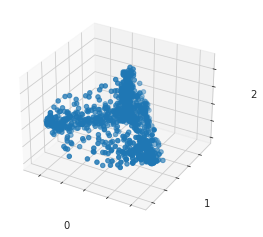

In [136]:
PCoA